In [14]:
# Import pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\sklearn\boston_house_prices.csv"
df1 = pd.read_csv(filepath, encoding = 'utf8',header=1)

In [15]:
# from sklearn import datasets
#  `load_boston` has been removed from scikit-learn since version 1.2.
# boston = datasets.load_boston()
# boston.keys()
# boston.DESCR
tar=df1['MEDV']
df1.drop('MEDV',inplace=True,axis=1)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [16]:
data=df1
target=tar
cols=data.columns


R^2: 0.7112260057484947
Root Mean Squared Error: 4.638689926172809
[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


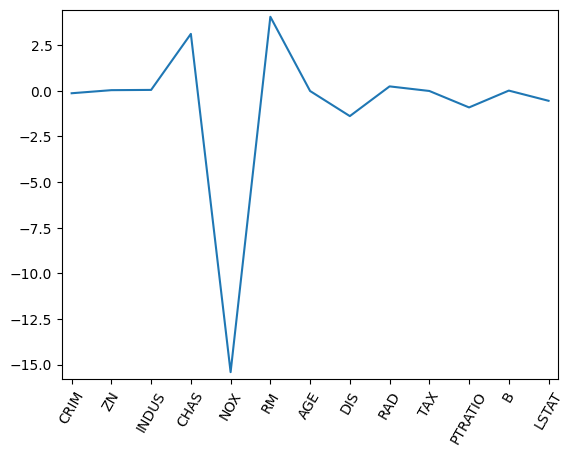

In [17]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

#coefs
print(reg_all.coef_)
# Plot the coefficients
plt.plot(range(len(data.columns)), reg_all.coef_)
plt.xticks(range(len(data.columns)), data.columns, rotation=60)
plt.margins(0.02)
plt.show()

In [18]:
#CROSS VALIDATION

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, data, target, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.3532759243958765


In [19]:
import matplotlib.pyplot as plt
X,y = data, target
df_columns=df1.columns

[-0.63230364  0.70840931 -0.          0.65760723 -1.57419335  2.82626903
 -0.         -2.42207901  1.19593681 -0.84646778 -1.92249345  0.76216539
 -3.72618383]


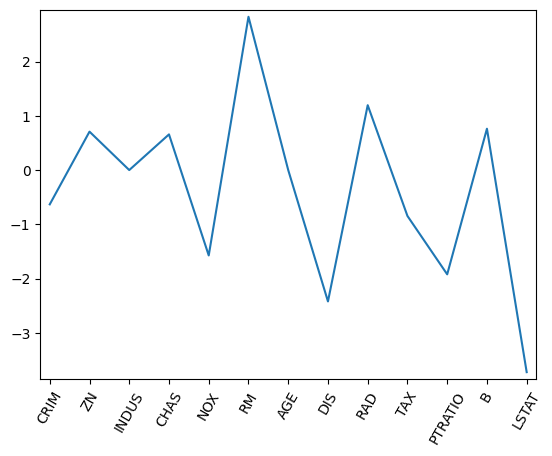

In [22]:
#LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Import Lasso
from sklearn.linear_model import Lasso

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.1))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# parameters = {'alpha': 0.1}

# Fit the pipeline to the training set: knn_scaled
lasso = pipeline.fit(X, y)
lasso_coef = pipeline.named_steps['lasso'].coef_

# # Import Lasso
# from sklearn.linear_model import Lasso

# # Instantiate a lasso regressor: lasso
# lasso = Lasso(alpha=0.1) #normalize=True

# # Fit the regressor to the data
# lasso.fit(X,y)

# # Compute and print the coefficients
# lasso_coef = lasso.coef_

print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), cols, rotation=60)
plt.margins(0.02)
plt.show()

In [23]:
#compare to lasso
lasso_cv = cross_val_score(lasso, X, y, cv=5)
print(lasso_cv)
np.mean(lasso_cv)

[ 0.68055007  0.73895707  0.58599513  0.0569819  -0.07728588]


0.39703965772741967

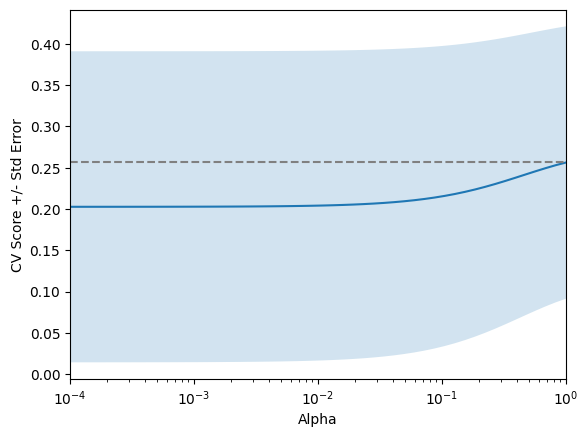

In [25]:
#what alfa

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# # Create a ridge regressor: ridge
ridge = Ridge() #normalize=True

# # Setup the pipeline steps: steps
# steps = [('scaler', StandardScaler()),
#         ('ridge', Ridge())]
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training set: knn_scaled
# ridge = pipeline.fit(X, y)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [31]:
#elastic net tuning
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+03, tolerance: 2.139e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.675e+03, tolerance: 2.106e+00 Linear regression models with null weight for the l1 regularizatio

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6637648307263887
Tuned ElasticNet MSE: 25.534903714957352


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.552e+03, tolerance: 2.704e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [34]:
#elastic net

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=42)

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Fit it to the training data
elastic_net.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = elastic_net.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(elastic_net.score(X_test, y_test)))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(elastic_net, data, target, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

R^2: 0.6590505847238239
[0.57022044 0.6626767  0.40322405 0.45880379 0.26833761]
Average 5-Fold CV Score: 0.472652519194106


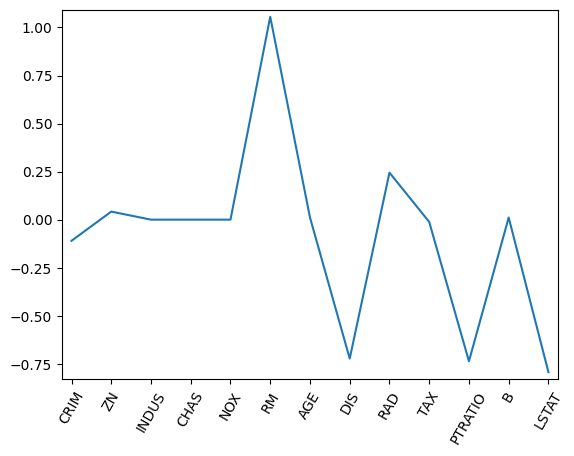

In [35]:
elastic_net.coef_
# Plot the coefficients
plt.plot(range(len(df_columns)), elastic_net.coef_)
plt.xticks(range(len(df_columns)), cols, rotation=60)
plt.margins(0.02)
plt.show()